In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")


In [2]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
print("train shape: ", train.shape)
print("test shape: ", test.shape)

train shape:  (1460, 81)
test shape:  (1459, 80)


In [4]:
full_data = [train,test]

In [5]:
test_ID = test['Id']

for dataset in full_data:
    dataset.drop('Id',axis=1,inplace=True)

In [6]:
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Histogram**

Text(0.5, 1.0, 'SalePrice distribution')

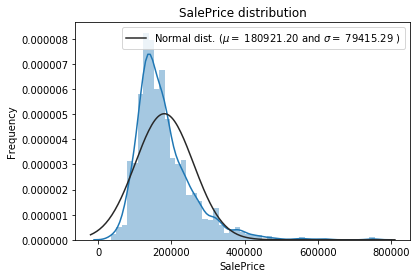

In [8]:
from scipy import stats
from scipy.stats import norm, skew

ax = sns.distplot(train['SalePrice'],fit = norm)
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [9]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Linear relationship**

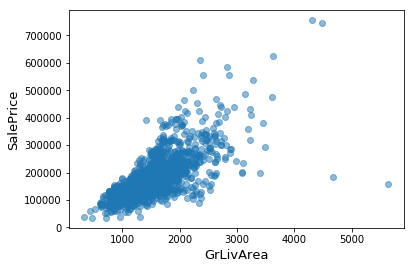

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'],alpha=0.5)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

**Deleting outliers**

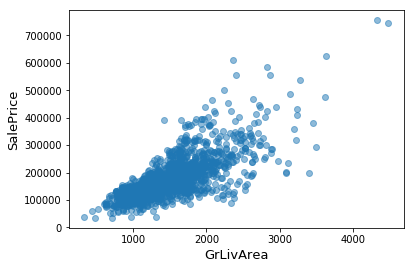

In [11]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'],alpha=0.5)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

**Log transformation**

In [12]:
train['SalePrice'] = np.log1p(train['SalePrice'])


Text(0.5, 1.0, 'SalePrice distribution')

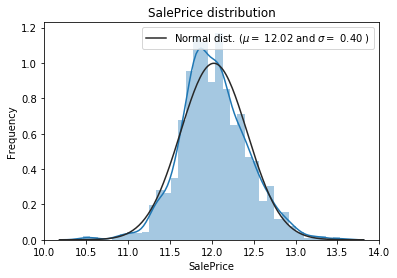

In [13]:
ax = sns.distplot(train['SalePrice'],fit=norm)
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


**Missing Values**

In [14]:
train_labels = train.pop('SalePrice')

In [15]:
features = pd.concat([train, test], keys=['train', 'test'])

**Categorical**

In [16]:
features.select_dtypes(include='object').isnull().sum()[features.select_dtypes(include='object').isnull().sum()>0]

MSZoning           4
Alley           2719
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2908
Fence           2346
MiscFeature     2812
SaleType           1
dtype: int64

**Numerical**

In [17]:
features.select_dtypes(include=['int','float']).isnull().sum()[features.select_dtypes(include=['int','float']).isnull().sum()>0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [18]:
all_data_na = (features.isnull().sum() / len(features)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


In [19]:
features.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis=1, inplace=True)

In [20]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    features[col] = features[col].fillna('None')

In [21]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)

In [22]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    features[col] = features[col].fillna(0)

In [23]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    features[col] = features[col].fillna('None')

In [24]:
for col in ('MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional','Electrical','Utilities'):
    features[col]=features[col].fillna(features[col].mode()[0])

In [25]:
features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].mean())

In [26]:
print(features.isnull().sum().sum())

0


**Label Encoding**

In [27]:
from sklearn.preprocessing import LabelEncoder
list_of_col = list(features.select_dtypes(include='object').columns)

for col in list_of_col:
    lbl = LabelEncoder() 
    lbl.fit(list(features[col].values)) 
    features[col] = lbl.transform(list(features[col].values))

# shape        
print('Shape all_data: {}'.format(features.shape))

Shape all_data: (2917, 74)


**Adding new feature**

In [28]:
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

**Standardizing numeric data**


In [29]:
numeric_features = features.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

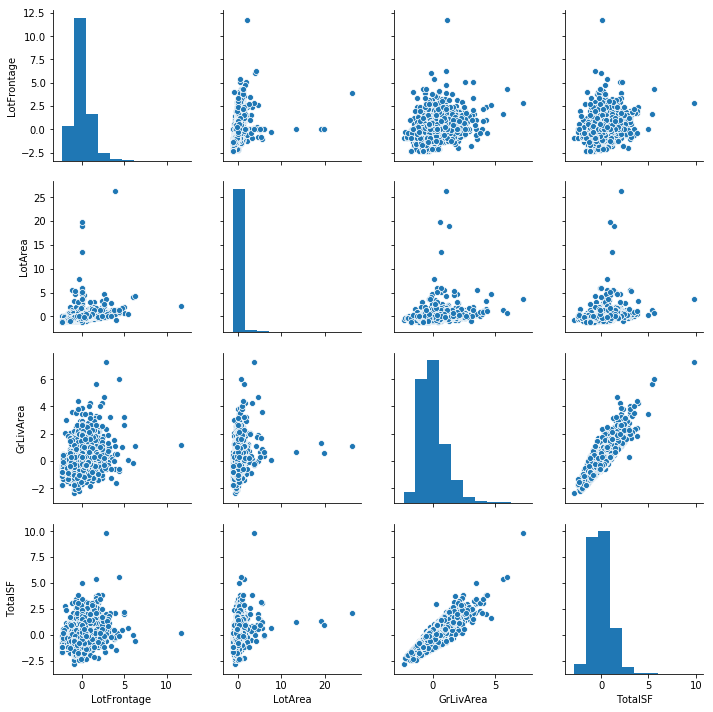

In [30]:
ax = sns.pairplot(numeric_features_standardized)

**Skewed features**


In [31]:
all_numeric_feats = features.dtypes[features.dtypes != "object"].index
skewed_feats = features[all_numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Utilities,53.981481
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
Condition2,12.340989
LowQualFinSF,12.084539
Heating,12.074570
3SsnPorch,11.372080
RoofMatl,8.722755
LandSlope,4.973254


In [32]:
skewness = skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    features[feat] = boxcox1p(features[feat], lam)
    
features[skewed_features] = np.log1p(features[skewed_features])

In [33]:
train_features = features.loc['train'].select_dtypes(include=[np.number])
test_features = features.loc['test'].select_dtypes(include=[np.number])

**Splitting data**

In [34]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.15, random_state=42)

**Models**

In [35]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn import linear_model,svm, ensemble
from sklearn.preprocessing import RobustScaler

lasso = make_pipeline(RobustScaler(), linear_model.Lasso(alpha =0.005, random_state=42)).fit(x_train, y_train)
ridge = linear_model.Ridge(alpha = 0.2, random_state=42).fit(x_train, y_train)
bayesian = linear_model.BayesianRidge(n_iter=300).fit(x_train, y_train)
svr = svm.SVR(kernel="linear").fit(x_train, y_train)
gbr = ensemble.GradientBoostingRegressor(n_estimators= 1500, max_depth= 4, min_samples_split= 10,
                                         learning_rate= 0.05, loss='huber').fit(x_train, y_train)

In [36]:
scores = cross_val_score(lasso, x_test, y_test, cv=5)
print("Lasso R-Square : %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Lasso R-Square : 0.8923 (+/- 0.05)


In [37]:
scores = cross_val_score(ridge, x_test, y_test, cv=5)
print("Ridge R-Square: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Ridge R-Square: 0.8683 (+/- 0.07)


In [38]:
scores = cross_val_score(bayesian, x_test, y_test, cv=5)
print("BayesianRidge R-Square: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

BayesianRidge R-Square: 0.8653 (+/- 0.08)


In [39]:
scores = cross_val_score(svr, x_test, y_test, cv=5)
print("SupportVectorRegression R-Square: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SupportVectorRegression R-Square: 0.8473 (+/- 0.09)


In [40]:
scores = cross_val_score(gbr, x_test, y_test, cv=5)
print("GradientBoostingRegression R-Square: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GradientBoostingRegression R-Square: 0.8531 (+/- 0.09)


**Submission**

In [41]:
pred1 = lasso.predict(test_features)
pred2 = gbr.predict(test_features)
pred3 = svr.predict(test_features)
pred = (np.exp(pred1) + np.exp(pred2) +  np.exp(pred3)) / 3 


In [42]:
output=pd.DataFrame({'Id':test_ID, 'SalePrice':pred})
output.to_csv('submission.csv', index=False)

In [43]:
output.head()

,Id,SalePrice
0,1461,122089.709701
1,1462,161492.864820
2,1463,188254.757723
3,1464,196676.146941
4,1465,182192.753559
